# Find out if you're part of the 2020 high-in-demand developers in Germany!

Based on StackOverflow's Developers Survey we analyzed the trend of programming languages in Germany over the last three years. 
There is clear evidence which languages are a secure choice for developers to get acquainted with.

In [13]:
import numpy as np
import pandas as pd
from collections import Counter

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

# to make plots
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# to change plot style
sns.set(style="darkgrid")

# to ignore warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [14]:
df2019=pd.read_csv("2019_survey_results_public.csv")
df2018=pd.read_csv("2018_survey_results_public.csv")
df2017=pd.read_csv("2017_survey_results_public.csv")

In [15]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


In [16]:
df2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,InvestTimeTools,WorkPayCare,KinshipDevelopers,ChallengeMyself,CompetePeers,ChangeWorld,JobSeekingStatus,HoursPerWeek,LastNewJob,AssessJobIndustry,AssessJobRole,AssessJobExp,AssessJobDept,AssessJobTech,AssessJobProjects,AssessJobCompensation,AssessJobOffice,AssessJobCommute,AssessJobRemote,AssessJobLeaders,AssessJobProfDevel,AssessJobDiversity,AssessJobProduct,AssessJobFinances,ImportantBenefits,ClickyKeys,JobProfile,ResumePrompted,LearnedHiring,ImportantHiringAlgorithms,ImportantHiringTechExp,ImportantHiringCommunication,ImportantHiringOpenSource,ImportantHiringPMExp,ImportantHiringCompanies,ImportantHiringTitles,ImportantHiringEducation,ImportantHiringRep,ImportantHiringGettingThingsDone,Currency,Overpaid,TabsSpaces,EducationImportant,EducationTypes,SelfTaughtTypes,TimeAfterBootcamp,CousinEducation,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedFramework,WantWorkFramework,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Methodology,VersionControl,CheckInCode,ShipIt,OtherPeoplesCode,ProjectManagement,EnjoyDebugging,InTheZone,DifficultCommunication,CollaborateRemote,MetricAssess,EquipmentSatisfiedMonitors,EquipmentSatisfiedCPU,EquipmentSatisfiedRAM,EquipmentSatisfiedStorage,EquipmentSatisfiedRW,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,Strongly agree,Strongly disagree,Agree,Agree,Disagree,Agree,"I'm not actively looking, but I am open to new...",0.0,Not applicable/ never,Very important,Very important,Important,Very important,Very important,Very important,Important,Very important,Very important,Very important,Very important,Very important,Somewhat important,Not very important,Somewhat important,Stock options; Vacation/days off; Remote options,Yes,Other,NaN,NaN,Important,Important,Important,Somewhat important,Important,Not very important,Not very important,Not at all important,Somewhat important,Very important,NaN,NaN,Tabs,NaN,Online course; Open source contributions,NaN,NaN,NaN,6:00 AM,Swift,Swift,NaN,NaN,NaN,NaN,iOS,iOS,Atom; Xcode,Turn on some music,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat satisfied,Not very satisfied,Not at all satisfied,Very satisfied,Satisfied,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At leas

Question 1: Which kind of developers are participating?

In [8]:
def display_bar_chart(df, column, title):
    '''
    Displays a bar chart with a title
    Returns:None
    
    '''
    status_vals = df[column].value_counts()
    dfp=(status_vals[:10]/df.shape[0])
    dfp.sort_values().plot(kind="barh");
    plt.title(title);

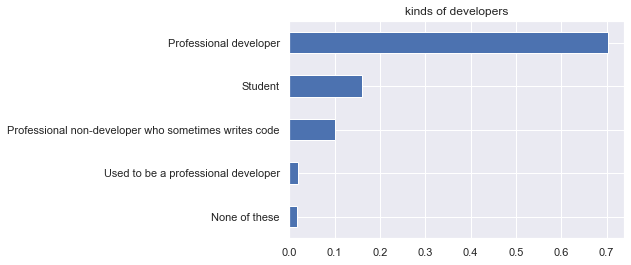

In [9]:
display_bar_chart(df2017, "Professional", "kinds of developers")

Question 2: What is the ratio of German developers?

In [43]:
dfco = df2017.query("Country=='Germany'")
ratio=dfco.shape[0]/df2017.shape[0]*100
print("German developers",ratio,"%")

German developers 8.06156600249066 %


Question 3: What is the ratio of male and female developers in Germany?

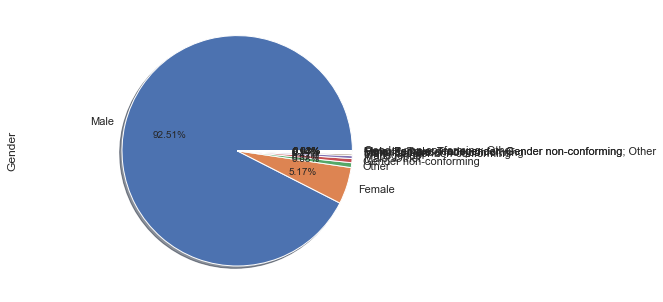

In [20]:
d1=df2017.query("Country=='Germany'")
#drop null values
d1=d1["Gender"].value_counts()
d1.dropna(inplace=True)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
# explode = (0.1, 0.1)
d1.plot(kind="pie", shadow=True,autopct='%1.2f%%')

Question 4: Which programming languages have been required most in Germany during the last 3 years?

In [21]:
def get_countery_data(df,country_col,country_name,columns):
    ''' grouping by countery '''
    df_copy =df 
    for column in columns:
        df_copy=df_copy[df_copy[country_col]==country_name].dropna(subset=[column])
    return df_copy

In [22]:
Ger2017=get_countery_data(df2017, 'Country', 'Germany', ['HaveWorkedLanguage', 'WantWorkLanguage'])
Ger2018=get_countery_data(df2018, 'Country', 'Germany', ['LanguageWorkedWith', 'LanguageDesireNextYear'])
Ger2019=get_countery_data(df2019, 'Country', 'Germany', ['LanguageWorkedWith', 'LanguageDesireNextYear'])

In [23]:
def split_column(df, column):
    ''' Split column by ;,
        returns a splited series.
    '''
    
    df_copy = df
    column_series = df_copy[column].apply(lambda x: x.split(';'))
    
    return column_series

In [24]:
# Splitting the Data Frame by column into a Series. 
worked_lang_2017 = split_column(Ger2017, 'HaveWorkedLanguage')
wanted_lang_2017 = split_column(Ger2017, 'WantWorkLanguage')

worked_lang_2018 = split_column(Ger2018, 'LanguageWorkedWith')
wanted_lang_2018 = split_column(Ger2018, 'LanguageDesireNextYear')

worked_lang_2019 = split_column(Ger2019, 'LanguageWorkedWith')
wanted_lang_2019 = split_column(Ger2019, 'LanguageDesireNextYear')

In [25]:
def disarray(array_list):
    ''' Flat a nested list,
        returns a flat list.
    '''
    
    objects = []
    
    for row in array_list:
        for obj in row:
            objects.append(obj.strip())
            
    return objects

# Flatting nested list objects.
list_worked_languages_2017 = disarray(worked_lang_2017)
list_wanted_languages_2017 = disarray(wanted_lang_2017)

list_worked_languages_2018 = disarray(worked_lang_2018)
list_wanted_languages_2018 = disarray(wanted_lang_2018)

list_worked_languages_2019 = disarray(worked_lang_2019)
list_wanted_languages_2019 = disarray(wanted_lang_2019)

In [26]:
def group_list(data_list, year):
    ''' Group by count to a list,
        returns a result dict.
    '''
    grouped_list = dict(Counter(data_list))
    grouped_dict = [{'Programming Language':key, 'Count': value, 'Year': year} for key, value in grouped_list.items()]
    
    return grouped_dict

# Groping a list and creating a dict.
dict_worked_languages_2017 = group_list(list_worked_languages_2017, '2017')
dict_wanted_languages_2017 = group_list(list_wanted_languages_2017, '2017')

dict_worked_languages_2018 = group_list(list_worked_languages_2018, '2018')
dict_wanted_languages_2018 = group_list(list_wanted_languages_2018, '2018')

dict_worked_languages_2019 = group_list(list_worked_languages_2019, '2019')
dict_wanted_languages_2019 = group_list(list_wanted_languages_2019, '2019')

In [27]:
dict_worked_languages_2019

[{'Programming Language': 'C++', 'Count': 1458, 'Year': '2019'},
 {'Programming Language': 'Java', 'Count': 2640, 'Year': '2019'},
 {'Programming Language': 'Kotlin', 'Count': 474, 'Year': '2019'},
 {'Programming Language': 'Python', 'Count': 2353, 'Year': '2019'},
 {'Programming Language': 'Bash/Shell/PowerShell',
  'Count': 2339,
  'Year': '2019'},
 {'Programming Language': 'C#', 'Count': 1523, 'Year': '2019'},
 {'Programming Language': 'HTML/CSS', 'Count': 3291, 'Year': '2019'},
 {'Programming Language': 'JavaScript', 'Count': 3415, 'Year': '2019'},
 {'Programming Language': 'SQL', 'Count': 2773, 'Year': '2019'},
 {'Programming Language': 'TypeScript', 'Count': 1252, 'Year': '2019'},
 {'Programming Language': 'WebAssembly', 'Count': 65, 'Year': '2019'},
 {'Programming Language': 'Clojure', 'Count': 78, 'Year': '2019'},
 {'Programming Language': 'Go', 'Count': 521, 'Year': '2019'},
 {'Programming Language': 'R', 'Count': 299, 'Year': '2019'},
 {'Programming Language': 'PHP', 'Count':

In [28]:
df1_1=pd.DataFrame(dict_worked_languages_2017).sort_values(by=['Count'], ascending=False).head(10)
df1_2=pd.DataFrame(dict_wanted_languages_2017).sort_values(by=['Count'], ascending=False).head(10)
df2_1=pd.DataFrame(dict_worked_languages_2018).sort_values(by=['Count'], ascending=False).head(10)
df2_2=pd.DataFrame(dict_wanted_languages_2018).sort_values(by=['Count'], ascending=False).head(10)
df3_1=pd.DataFrame(dict_worked_languages_2019).sort_values(by=['Count'], ascending=False).head(10)
df3_2=pd.DataFrame(dict_wanted_languages_2019).sort_values(by=['Count'], ascending=False).head(10)

In [29]:
df3_1

,Programming Language,Count,Year
7,JavaScript,3415,2019
6,HTML/CSS,3291,2019
8,SQL,2773,2019
1,Java,2640,2019
3,Python,2353,2019
4,Bash/Shell/PowerShell,2339,2019
5,C#,1523,2019
14,PHP,1519,2019
0,C++,1458,2019
9,TypeScript,1252,2019


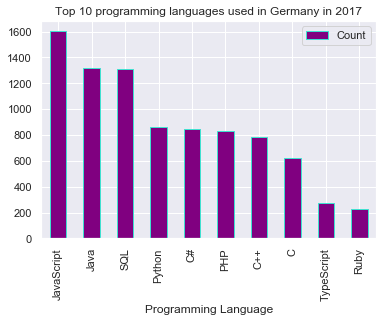

In [35]:
ax1=df1_1.plot.bar(x="Programming Language",y="Count", color="purple",edgecolor="turquoise")
plt.title("Top 10 programming languages used in Germany in 2017");

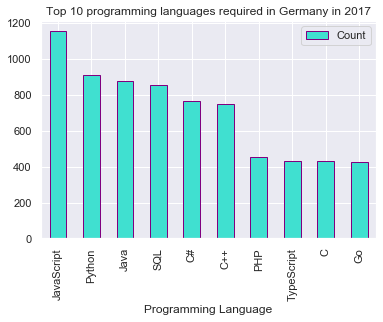

In [34]:
ax1=df1_2.plot.bar(x="Programming Language",y="Count",color="turquoise",edgecolor="purple")
plt.title("Top 10 programming languages required in Germany in 2017");

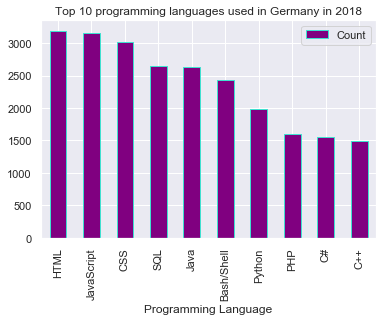

In [36]:
ax1=df2_1.plot.bar(x="Programming Language",y="Count",color="purple",edgecolor="turquoise")
plt.title("Top 10 programming languages used in Germany in 2018");

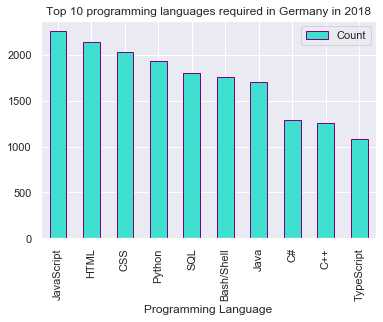

In [37]:
ax1=df2_2.plot.bar(x="Programming Language",y="Count",color="turquoise",edgecolor="purple")
plt.title("Top 10 programming languages required in Germany in 2018");

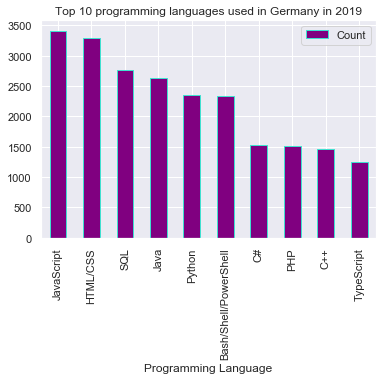

In [38]:
ax1=df3_1.plot.bar(x="Programming Language",y="Count",color="purple",edgecolor="turquoise")
plt.title("Top 10 programming languages used in Germany in 2019");

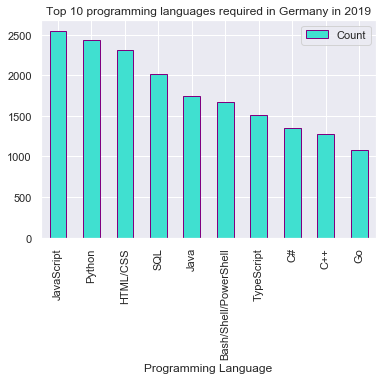

In [39]:
ax1=df3_2.plot.bar(x="Programming Language",y="Count",color="turquoise",edgecolor="purple")
plt.title("Top 10 programming languages required in Germany in 2019");

## Results

When looking at the results it becomes evident that the younger programming languages are in higher demand and usage. The older programming languages like C# aren't part of the upper five, but still occupy a spot in the top ranges. 
Even though subject to fluctuations, Python has increased in the usage as well as in the demand ratio over the last three years and is highly required in 2019 right after JavaScript.

### References

Stackoverflow Developer Survey Data: https://insights.stackoverflow.com/survey